# Phase 1: Data Exploration

**Objective:** Understand ERCOT electricity market data, renewable generation patterns, and relationships between variables.

**Author:** Amalie Berg  
**Date:** October 2025

---

## Contents
1. [Setup and Data Loading](#setup)
2. [Price Analysis](#prices)
3. [Load and Renewable Generation](#generation)
4. [Weather Data](#weather)
5. [Feature Relationships](#relationships)
6. [Time Series Characteristics](#timeseries)
7. [Key Insights](#insights)

## 1. Setup and Data Loading <a id='setup'></a>

In [2]:
# Import libraries
import sys
sys.path.append('..')  # Add parent directory to path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from src import data_processing, visualization

# Configure plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

ImportError: cannot import name 'data_processing' from partially initialized module 'src' (most likely due to a circular import) (C:\Users\Amalie Berg\renewable_portfolio_optimization\renewable-portfolio-optimization\notebooks\..\src\__init__.py)

### Load Data

First, let's check if data exists. If not, we'll generate it.

In [1]:
# Check if processed data exists
data_path = Path('../data/processed/merged_data.csv')

if not data_path.exists():
    print("Processed data not found. Running data collection...")
    df = data_processing.main()
else:
    print("Loading existing processed data...")
    df = pd.read_csv(data_path, parse_dates=['datetime'])

print(f"\nData loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")

NameError: name 'Path' is not defined

### Initial Data Inspection

In [5]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,datetime,settlement_point,dam_price,system_load_mw,wind_generation_mw,solar_generation_mw,total_renewable_mw,temperature_f,solar_irradiance_w_m2,wind_speed_ms,hour,day_of_week,month,is_weekend,price_lag_1h,price_lag_24h,price_lag_168h,price_ma_24h,price_std_24h,renewable_penetration
0,2023-01-01 00:00:00,HB_HOUSTON,12.655704,36747.180159,2907.432228,0.0,2907.432228,30.101624,0.0,5.167132,0,6,1,1,NaN,NaN,NaN,NaN,NaN,0.079120
1,2023-01-01 01:00:00,HB_HOUSTON,59.991925,34722.085006,2468.419054,0.0,2468.419054,28.215274,0.0,9.236944,1,6,1,1,12.655704,NaN,NaN,NaN,NaN,0.071091
2,2023-01-01 02:00:00,HB_HOUSTON,15.420195,36681.145462,2853.189458,0.0,2853.189458,23.837063,0.0,6.975455,2,6,1,1,59.991925,NaN,NaN,NaN,NaN,0.077784
3,2023-01-01 03:00:00,HB_HOUSTON,22.180681,37798.588080,2622.187090,0.0,2622.187090,22.338529,0.0,7.427267,3,6,1,1,15.420195,NaN,NaN,NaN,NaN,0.069373
4,2023-01-01 04:00:00,HB_HOUSTON,16.501367,42448.527000,2621.471484,0.0,2621.471484,17.547348,0.0,6.087954,4,6,1,1,22.180681,NaN,NaN,NaN,NaN,0.061756


In [6]:
# Data types and missing values
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datetime               17521 non-null  datetime64[ns]
 1   settlement_point       17521 non-null  object        
 2   dam_price              17521 non-null  float64       
 3   system_load_mw         17521 non-null  float64       
 4   wind_generation_mw     17521 non-null  float64       
 5   solar_generation_mw    17521 non-null  float64       
 6   total_renewable_mw     17521 non-null  float64       
 7   temperature_f          17521 non-null  float64       
 8   solar_irradiance_w_m2  17521 non-null  float64       
 9   wind_speed_ms          17521 non-null  float64       
 10  hour                   17521 non-null  int64         
 11  day_of_week            17521 non-null  int64         
 12  month                  17521 non-null  int64    

In [7]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,datetime,dam_price,system_load_mw,wind_generation_mw,solar_generation_mw,total_renewable_mw,temperature_f,solar_irradiance_w_m2,wind_speed_ms,hour,day_of_week,month,is_weekend,price_lag_1h,price_lag_24h,price_lag_168h,price_ma_24h,price_std_24h,renewable_penetration
count,17521,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17520.000000,17497.000000,17353.000000,17498.000000,17498.000000,17521.000000
mean,2024-01-01 00:00:00,29.596089,57844.975886,10797.458460,2015.767164,12813.225623,60.002303,142.374860,6.995928,11.499344,2.999886,6.512642,0.286285,29.596878,29.592127,29.610360,29.595348,13.607089,0.222405
min,2023-01-01 00:00:00,0.000000,32432.040730,2406.832201,0.000000,2412.870380,11.916494,0.000000,2.001789,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.128806,8.533995,0.046247
25%,2023-07-02 12:00:00,18.614855,51400.583488,5040.628318,0.000000,7218.948427,40.313199,0.000000,4.685168,5.000000,1.000000,4.000000,0.000000,18.615853,18.608115,18.621827,22.867287,11.624066,0.120199
50%,2024-01-01 00:00:00,28.897751,57636.751239,10722.623738,0.000000,12657.913613,59.978262,0.000000,6.968659,11.000000,3.000000,7.000000,0.000000,28.899138,28.897751,28.918810,29.493825,12.759952,0.203184
75%,2024-07-01 12:00:00,39.571618,64463.968484,16336.106148,3329.913196,17968.927802,79.597012,209.743460,8.773173,17.000000,5.000000,10.000000,1.000000,39.572137,39.562121,39.600115,36.169659,15.550101,0.318238
max,2024-12-31 00:00:00,119.466400,80463.115903,20981.601783,11928.925396,29647.433116,107.514106,991.671331,25.000000,23.000000,6.000000,12.000000,1.000000,119.466400,119.466400,119.466400,46.544504,26.487600,0.586598
std,NaN,15.535709,8854.099004,5778.410018,2832.901748,6548.592025,22.587249,236.389812,2.904637,6.922732,2.003479,3.446190,0.452037,15.535802,15.540249,15.559549,7.561325,2.674204,0.117246


## 2. Price Analysis <a id='prices'></a>

Let's analyze ERCOT Day-Ahead Market (DAM) electricity prices.

Saved to C:\Users\Amalie Berg\renewable_portfolio_optimization\renewable-portfolio-optimization\notebooks\..\results\figures\price_timeseries.png


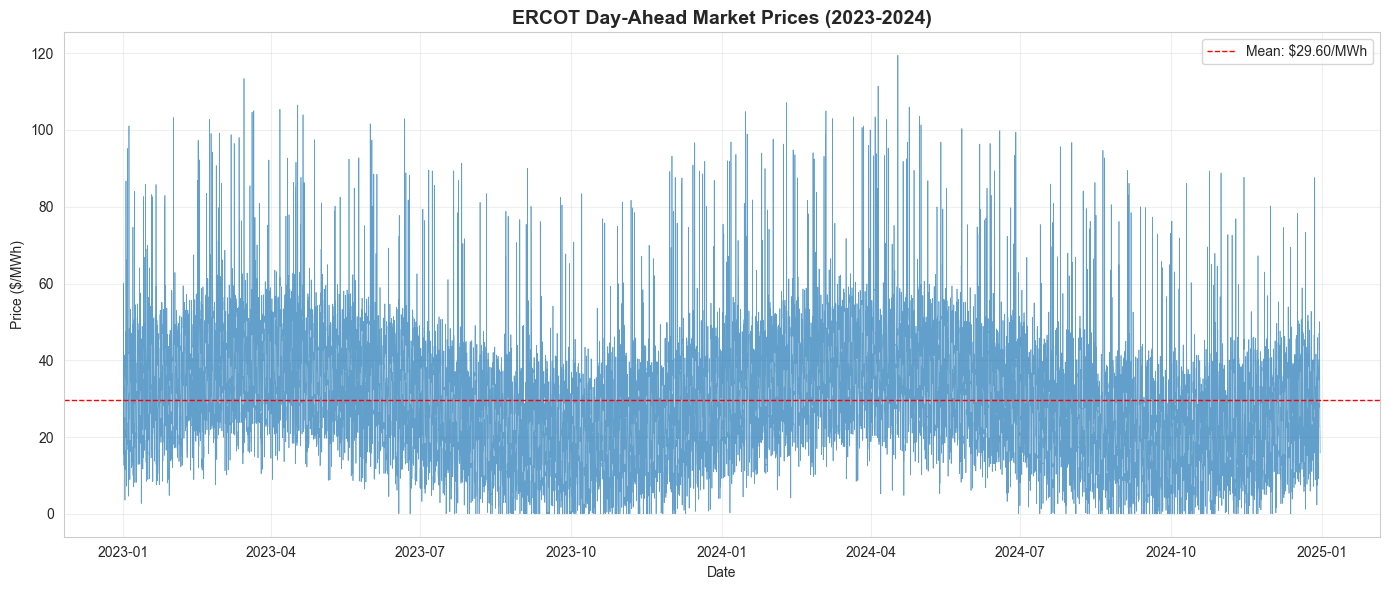

In [8]:
# Price time series
visualization.plot_price_timeseries(
    df, 
    title='ERCOT Day-Ahead Market Prices (2023-2024)',
    save_path='price_timeseries.png'
)
plt.show()

Saved to C:\Users\Amalie Berg\renewable_portfolio_optimization\renewable-portfolio-optimization\notebooks\..\results\figures\price_distribution.png


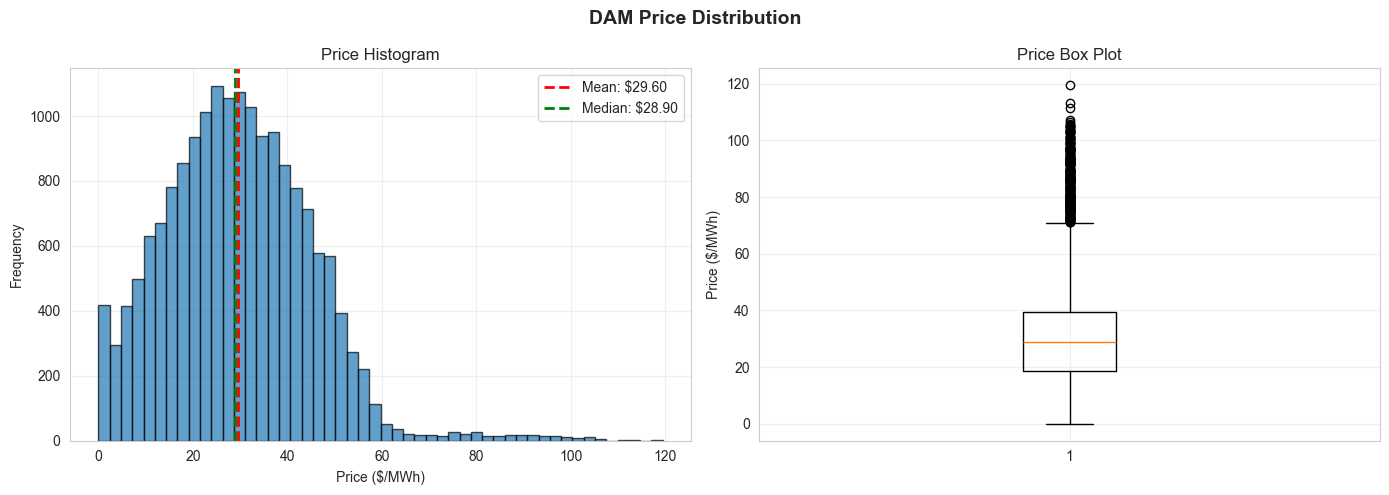

In [9]:
# Price distribution
visualization.plot_price_distribution(
    df,
    title='DAM Price Distribution',
    save_path='price_distribution.png'
)
plt.show()

In [10]:
# Price statistics
print("Price Statistics:")
print(f"Mean: ${df['dam_price'].mean():.2f}/MWh")
print(f"Median: ${df['dam_price'].median():.2f}/MWh")
print(f"Std Dev: ${df['dam_price'].std():.2f}/MWh")
print(f"Min: ${df['dam_price'].min():.2f}/MWh")
print(f"Max: ${df['dam_price'].max():.2f}/MWh")
print(f"\n95th Percentile: ${df['dam_price'].quantile(0.95):.2f}/MWh")
print(f"5th Percentile: ${df['dam_price'].quantile(0.05):.2f}/MWh")

# Identify price spikes (>95th percentile)
spike_threshold = df['dam_price'].quantile(0.95)
spikes = df[df['dam_price'] > spike_threshold]
print(f"\nNumber of price spikes (>95th %ile): {len(spikes)} hours ({len(spikes)/len(df)*100:.2f}%)")

Price Statistics:
Mean: $29.60/MWh
Median: $28.90/MWh
Std Dev: $15.54/MWh
Min: $0.00/MWh
Max: $119.47/MWh

95th Percentile: $53.32/MWh
5th Percentile: $5.89/MWh

Number of price spikes (>95th %ile): 876 hours (5.00%)


### Temporal Patterns

Saved to C:\Users\Amalie Berg\renewable_portfolio_optimization\renewable-portfolio-optimization\notebooks\..\results\figures\price_hourly_pattern.png


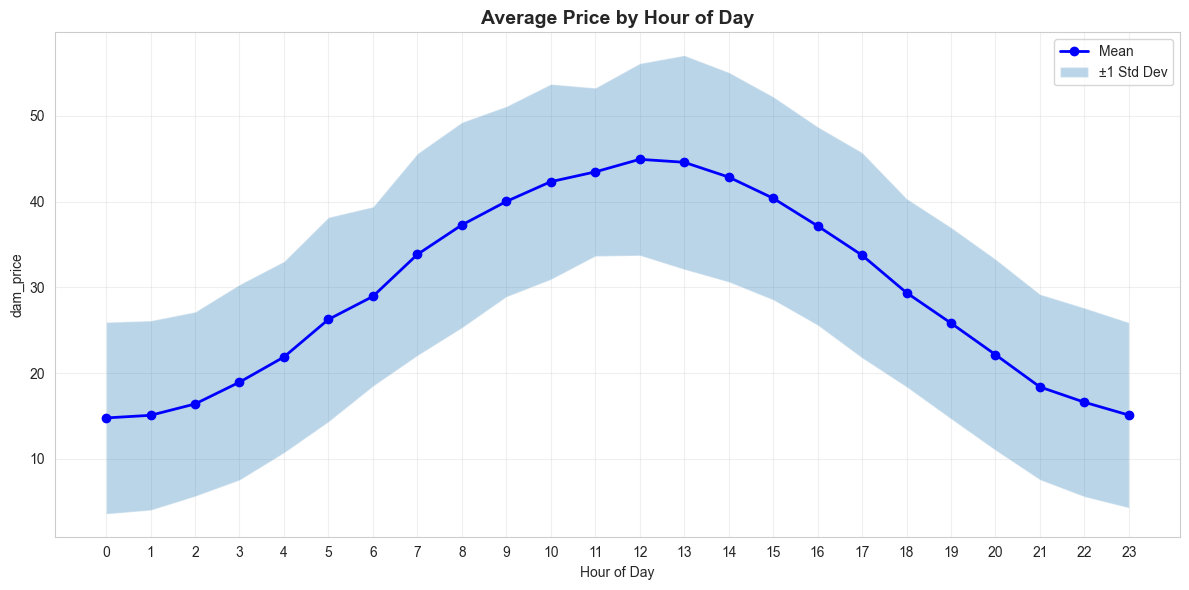

In [9]:
# Hourly patterns
visualization.plot_hourly_patterns(
    df,
    value_col='dam_price',
    title='Average Price by Hour of Day',
    save_path='price_hourly_pattern.png'
)
plt.show()

Saved to C:\Users\Amalie Berg\renewable_portfolio_optimization\renewable-portfolio-optimization\notebooks\..\results\figures\price_seasonal_pattern.png


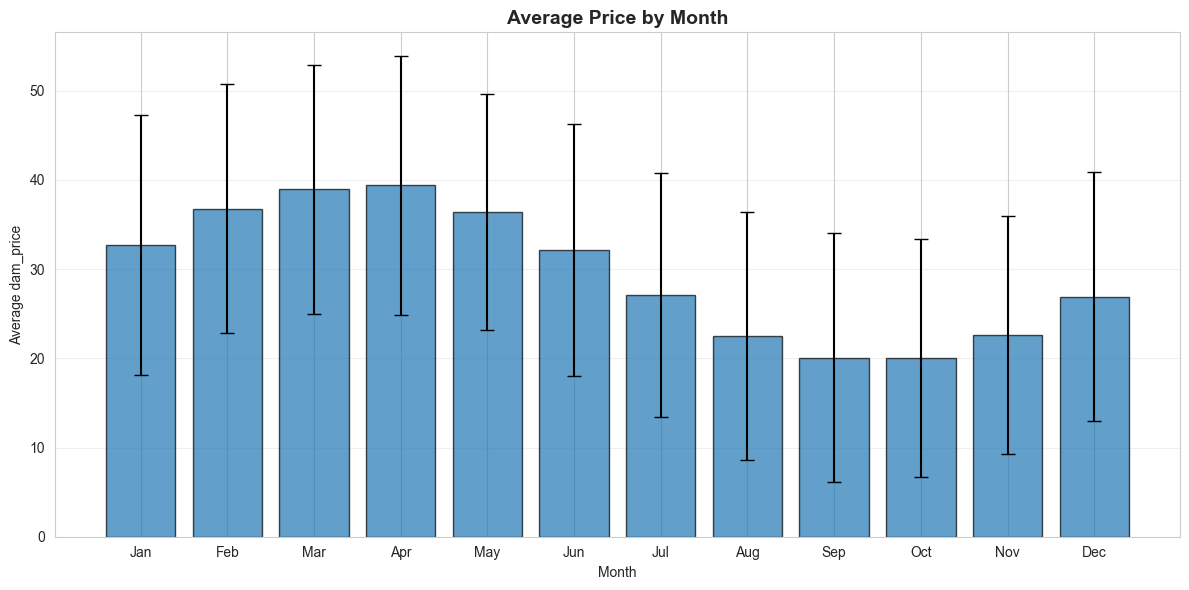

In [10]:
# Seasonal patterns
visualization.plot_seasonal_patterns(
    df,
    value_col='dam_price',
    title='Average Price by Month',
    save_path='price_seasonal_pattern.png'
)
plt.show()

## 3. Load and Renewable Generation <a id='generation'></a>

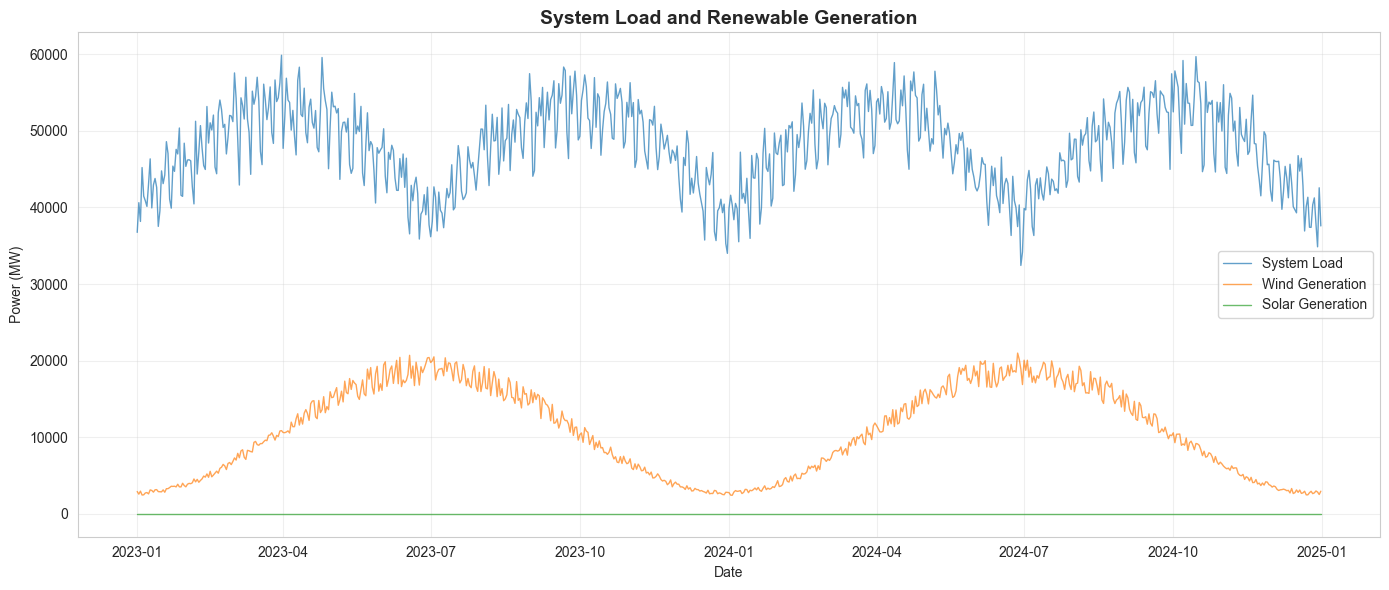

In [11]:
# Plot load and generation over time
fig, ax = plt.subplots(figsize=(14, 6))

# Sample every 24 hours for cleaner plot
df_daily = df.iloc[::24]

ax.plot(df_daily['datetime'], df_daily['system_load_mw'], 
        label='System Load', alpha=0.7, linewidth=1)
ax.plot(df_daily['datetime'], df_daily['wind_generation_mw'], 
        label='Wind Generation', alpha=0.7, linewidth=1)
ax.plot(df_daily['datetime'], df_daily['solar_generation_mw'], 
        label='Solar Generation', alpha=0.7, linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Power (MW)')
ax.set_title('System Load and Renewable Generation', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/load_generation_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Renewable penetration statistics
print("Renewable Generation Statistics:")
print(f"\nWind Generation:")
print(f"  Mean: {df['wind_generation_mw'].mean():.0f} MW")
print(f"  Max: {df['wind_generation_mw'].max():.0f} MW")

print(f"\nSolar Generation:")
print(f"  Mean: {df['solar_generation_mw'].mean():.0f} MW")
print(f"  Max: {df['solar_generation_mw'].max():.0f} MW")

print(f"\nRenewable Penetration:")
print(f"  Mean: {df['renewable_penetration'].mean()*100:.1f}%")
print(f"  Max: {df['renewable_penetration'].max()*100:.1f}%")

Renewable Generation Statistics:

Wind Generation:
  Mean: 10797 MW
  Max: 20982 MW

Solar Generation:
  Mean: 2016 MW
  Max: 11929 MW

Renewable Penetration:
  Mean: 22.2%
  Max: 58.7%


## 4. Weather Data <a id='weather'></a>

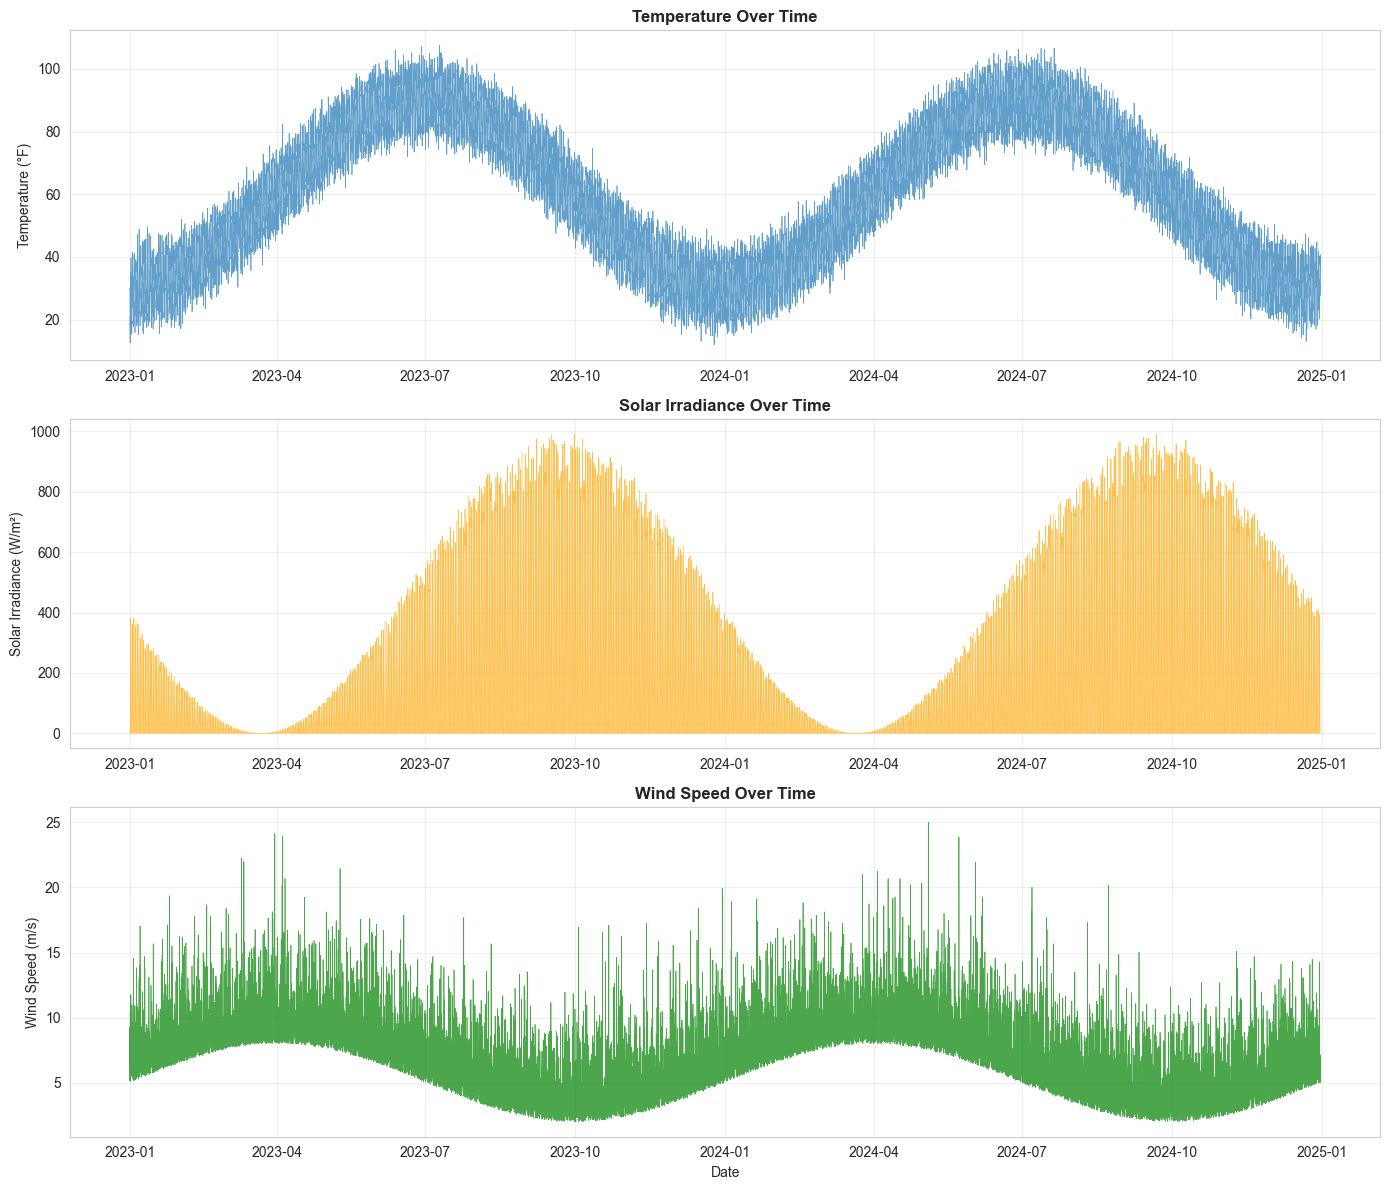

In [12]:
# Weather patterns
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Temperature
axes[0].plot(df['datetime'], df['temperature_f'], linewidth=0.5, alpha=0.7)
axes[0].set_ylabel('Temperature (°F)')
axes[0].set_title('Temperature Over Time', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Solar irradiance
axes[1].plot(df['datetime'], df['solar_irradiance_w_m2'], linewidth=0.5, alpha=0.7, color='orange')
axes[1].set_ylabel('Solar Irradiance (W/m²)')
axes[1].set_title('Solar Irradiance Over Time', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Wind speed
axes[2].plot(df['datetime'], df['wind_speed_ms'], linewidth=0.5, alpha=0.7, color='green')
axes[2].set_ylabel('Wind Speed (m/s)')
axes[2].set_xlabel('Date')
axes[2].set_title('Wind Speed Over Time', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/weather_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Feature Relationships <a id='relationships'></a>

Saved to C:\Users\Amalie Berg\renewable_portfolio_optimization\renewable-portfolio-optimization\notebooks\..\results\figures\correlation_heatmap.png


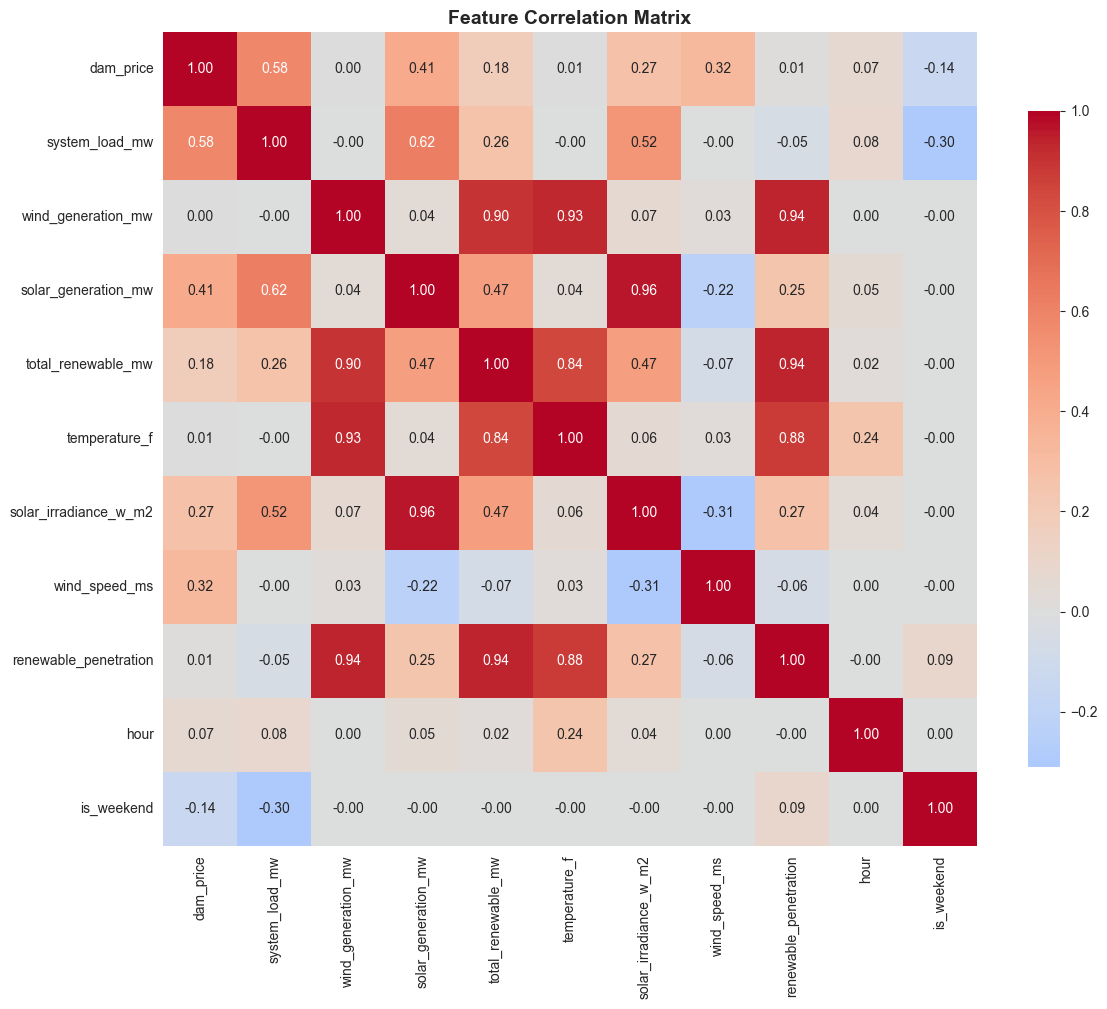

In [13]:
# Select key features for correlation analysis
key_features = [
    'dam_price', 'system_load_mw', 'wind_generation_mw', 
    'solar_generation_mw', 'total_renewable_mw',
    'temperature_f', 'solar_irradiance_w_m2', 'wind_speed_ms',
    'renewable_penetration', 'hour', 'is_weekend'
]

visualization.plot_correlation_heatmap(
    df[key_features],
    title='Feature Correlation Matrix',
    save_path='correlation_heatmap.png'
)
plt.show()

Saved to C:\Users\Amalie Berg\renewable_portfolio_optimization\renewable-portfolio-optimization\notebooks\..\results\figures\price_vs_load.png


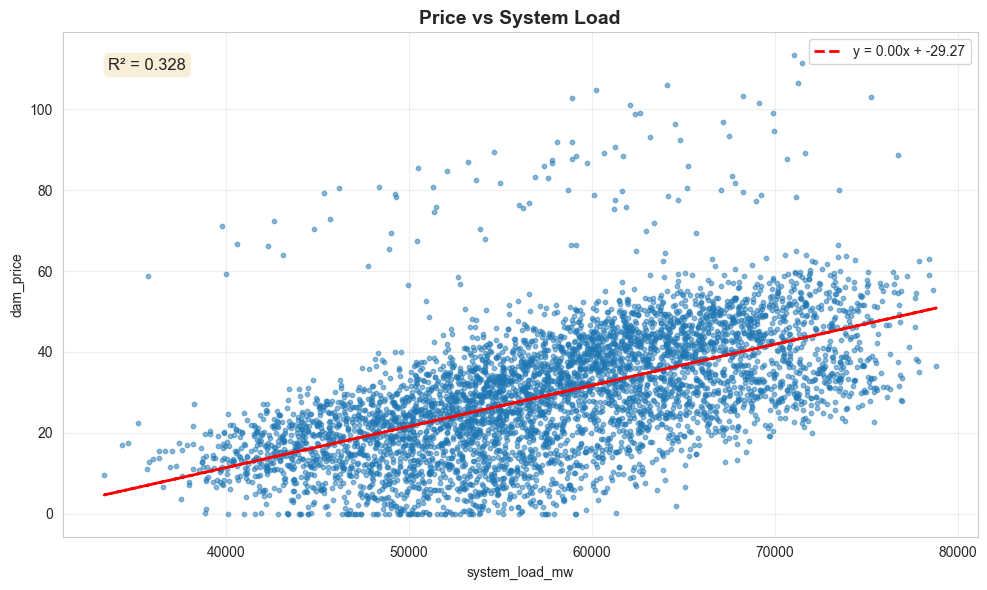

In [14]:
# Price vs Load
visualization.plot_scatter_with_regression(
    df.sample(n=min(5000, len(df))),  # Sample for cleaner plot
    'system_load_mw',
    'dam_price',
    title='Price vs System Load',
    save_path='price_vs_load.png'
)
plt.show()

Saved to C:\Users\Amalie Berg\renewable_portfolio_optimization\renewable-portfolio-optimization\notebooks\..\results\figures\price_vs_renewables.png


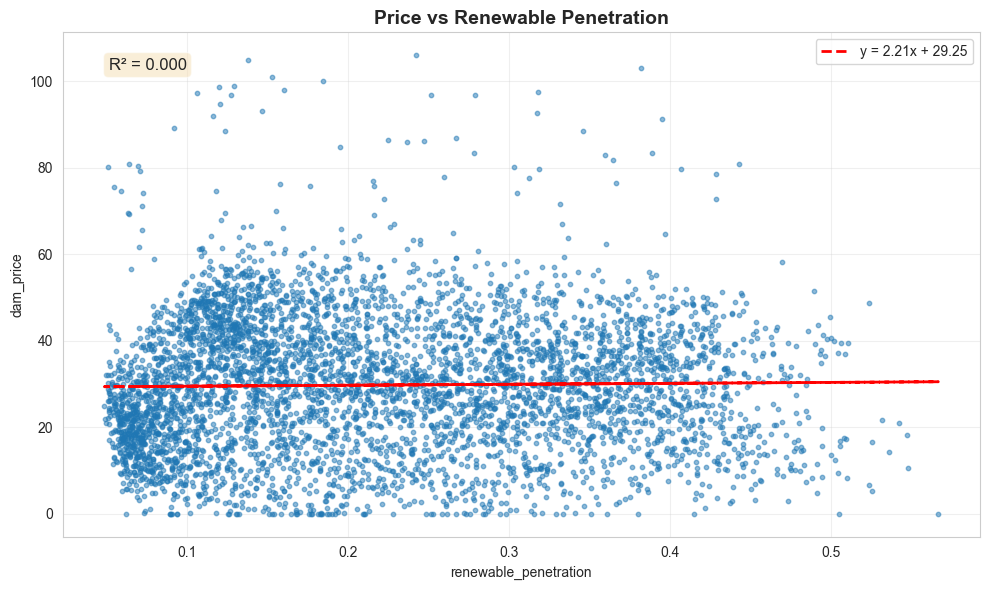

In [16]:
# Price vs Renewable Penetration
visualization.plot_scatter_with_regression(
    df.sample(n=min(5000, len(df))),
    'renewable_penetration',
    'dam_price',
    title='Price vs Renewable Penetration',
    save_path='price_vs_renewables.png'
)
plt.show()

## 6. Time Series Characteristics <a id='timeseries'></a>

Check for stationarity, autocorrelation, and other time series properties.

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test for stationarity
adf_result = adfuller(df['dam_price'].dropna())
print("Augmented Dickey-Fuller Test for Price:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value:.3f}")

if adf_result[1] < 0.05:
    print("\nConclusion: Price series is STATIONARY (reject null hypothesis)")
else:
    print("\nConclusion: Price series is NON-STATIONARY (fail to reject null hypothesis)")

Augmented Dickey-Fuller Test for Price:
ADF Statistic: -5.8085
p-value: 0.0000
Critical Values:
  1%: -3.431
  5%: -2.862
  10%: -2.567

Conclusion: Price series is STATIONARY (reject null hypothesis)


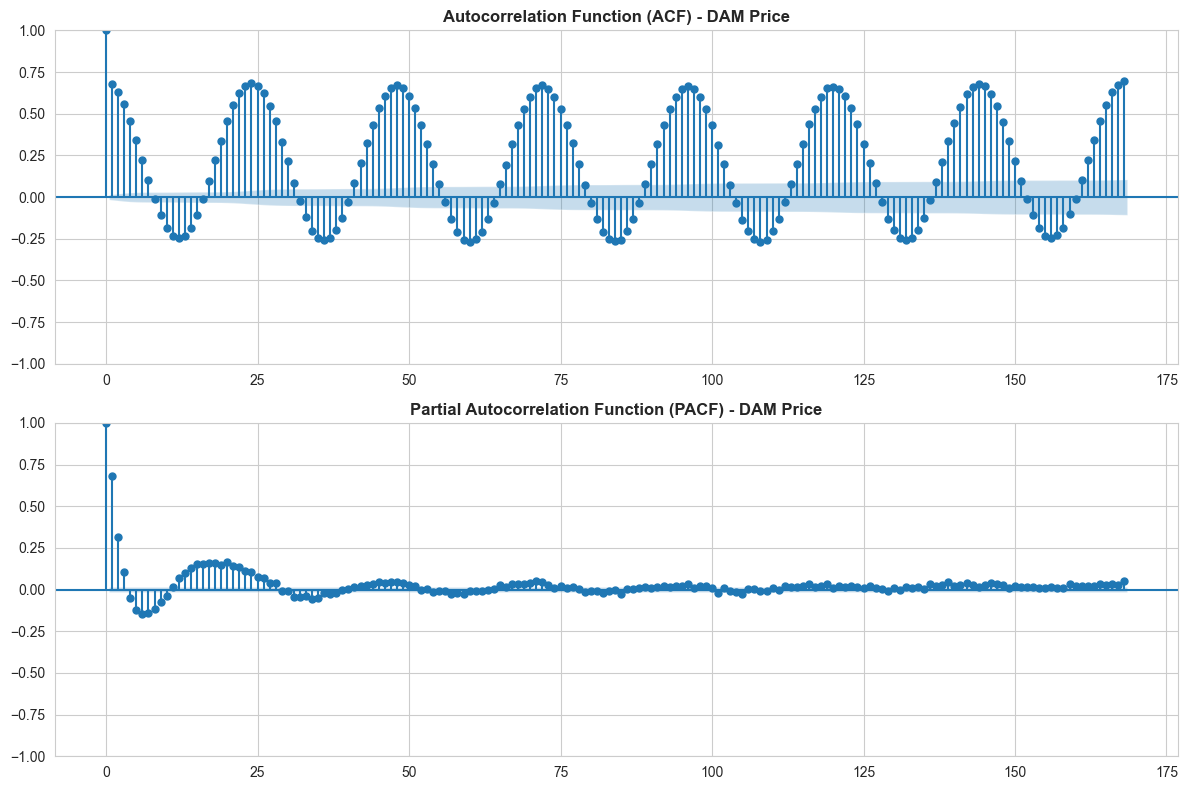

In [16]:
# ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df['dam_price'].dropna(), lags=168, ax=axes[0])  # 1 week of hourly data
axes[0].set_title('Autocorrelation Function (ACF) - DAM Price', fontweight='bold')

plot_pacf(df['dam_price'].dropna(), lags=168, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) - DAM Price', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/price_acf_pacf.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Key Insights <a id='insights'></a>

### Summary Dashboard

Dashboard saved to C:\Users\Amalie Berg\renewable_portfolio_optimization\renewable-portfolio-optimization\notebooks\..\results\figures\summary_dashboard.png


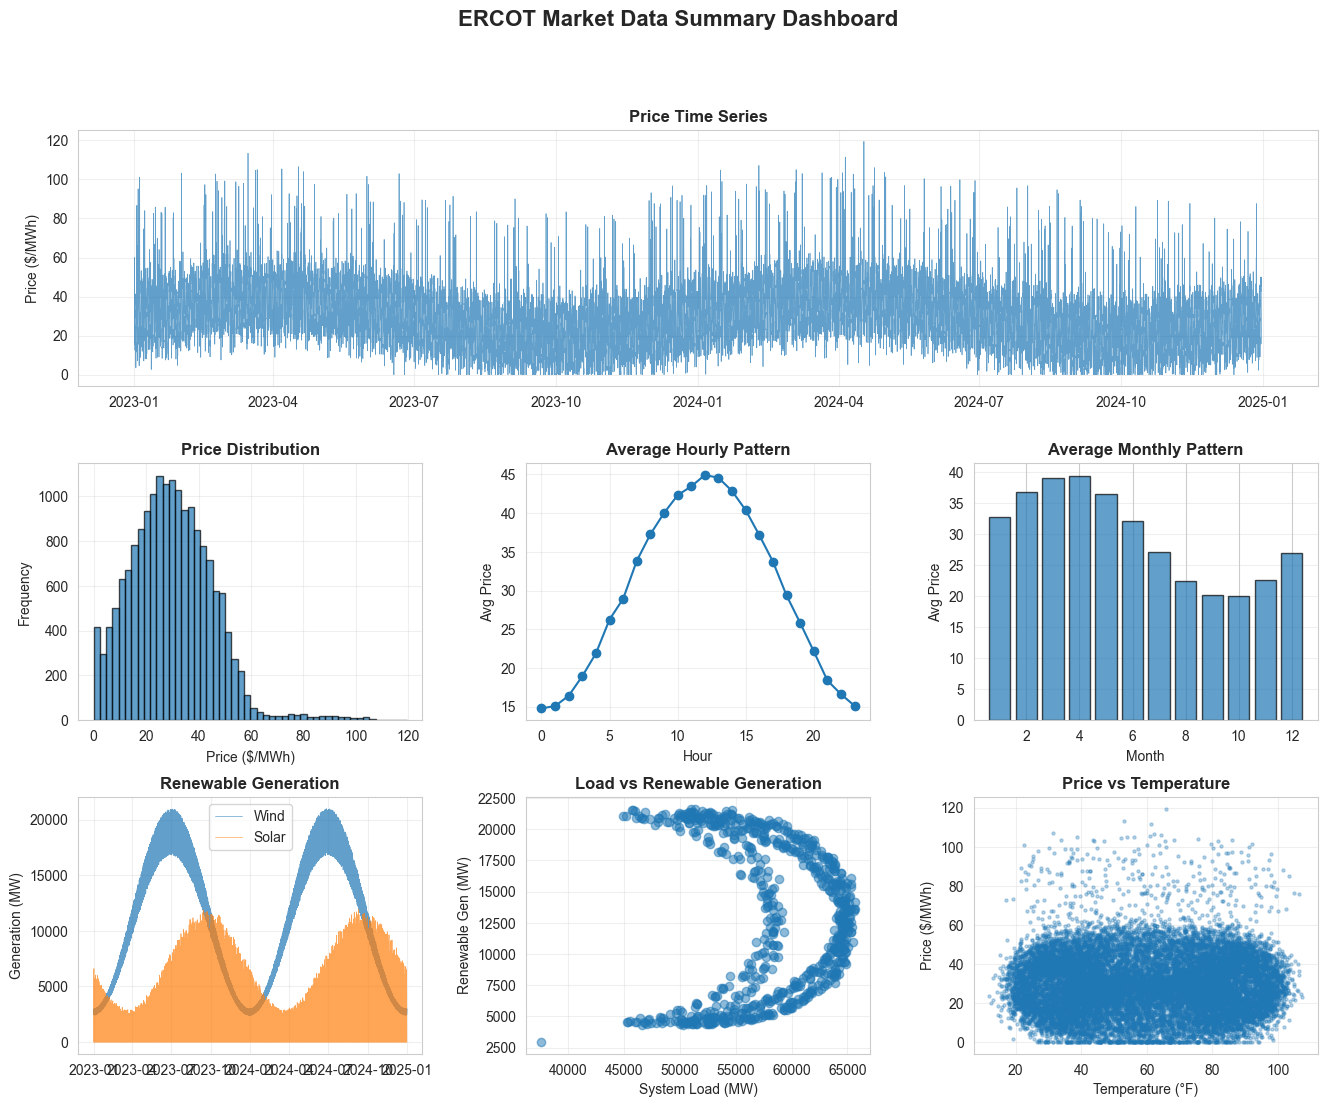

In [17]:
# Create comprehensive dashboard
visualization.create_summary_dashboard(df)
plt.show()

### Key Findings

**Price Characteristics:**
1. Prices show strong hourly patterns (peak during day, low at night)
2. Seasonal variation with higher prices in summer/winter
3. Occasional price spikes indicating scarcity conditions
4. Strong autocorrelation suggests time series models will be effective

**Renewable Generation:**
1. Wind generation is relatively steady but with high variability
2. Solar follows clear diurnal pattern (zero at night)
3. Combined renewables contribute significant portion of supply

**Relationships:**
1. Positive correlation between load and price (demand driving prices)
2. Temperature affects both load (cooling/heating demand) and prices
3. Higher renewable penetration may be associated with lower prices (merit order effect)

**Implications for Modeling:**
1. Need to capture hourly and seasonal patterns
2. GARCH models appropriate for volatility clustering
3. Weather variables are important predictors
4. Must account for renewable generation uncertainty in portfolio optimization

---

## Next Steps

1. **Phase 2:** Build price forecasting models (GARCH, ARIMA, XGBoost, LSTM)
2. **Phase 3:** Model renewable generation with Monte Carlo simulation
3. **Phase 4:** Optimize portfolio allocation
4. **Phase 5:** Develop and backtest hedging strategies

---

**End of Notebook**

Save your work and proceed to `02_price_forecasting.ipynb`